### **Import the required libraries**

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

### **Define the parser required to read the timestamp**

In [3]:
def custom_date_parser(a):
    return datetime.strptime(a, '%d-%m-%Y %H:%M_%S.%f')

### **Define the dataframe**

In [5]:
df = pd.read_csv(
    '~/Downloads/Fluorometer/Basil_Trial/03-07-22/03-07-2022_05_00.csv',
    parse_dates=['Timestamp'],
    date_parser=custom_date_parser)
x = df['Timestamp']
y = df['Mean_values']

### **Find the peaks on the signal**

In [8]:
# As per accepted answer here:
# https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
peaks, _ = find_peaks(y, prominence=6)

### **Find the lowest points in the graph or valleys**

In [9]:
# Invert the data to find the lowest points of peaks as per answer here:
# https://stackoverflow.com/questions/61365881/is-there-an-opposite-version-of-scipy-find-peaks
valleys, _ = find_peaks(-y, prominence=1)

In [11]:
# valley in the short time period before a peak
# set time window, e.g., for 200 ms
time_window_size = pd.Timedelta(4000, unit="ms")
time_of_peaks = x[peaks]
peak_start = x.searchsorted(time_of_peaks - time_window_size)

In [12]:
# in case of evenly spaced data points, this can be simplified,
# and you just add n data points to your peak index array
# peak_start = peaks - n
true_valleys = peaks.copy()
for i, (start, stop) in enumerate(zip(peak_start, peaks)):
    true_valleys[i] = start + y[start:stop].argmin()

### **Find the first peak and valley to calculate NPQ**

In [13]:
 first_peak = y[peaks[0]]
first_valley = y[true_valleys[0]]

### **Find the latest peak and valley to calculate PSII**

In [15]:
last_peak = y[peaks[-1]]
last_valley = y[true_valleys[-1]]

### **Assign numbers to each peak and valley value using enumerate**

In [16]:
for index, val in enumerate(y[peaks], start=1):
    print(index, val)

1 162.32178385416668
2 153.43668294270833
3 154.26710286458334
4 154.33011067708335
5 155.416533203125
6 156.04002929687502
7 156.64825846354168
8 157.21987304687502
9 156.72741861979168
10 156.61253580729166
11 156.4665234375
12 156.92754557291667
13 157.1797330729167
14 157.66570312500002
15 157.37735026041668
16 157.75030924479168
17 68.12322591145833
18 157.9852115885417
19 158.34812174479168
20 158.45870768229167
21 158.59964192708335
22 159.0088346354167
23 159.34180338541668
24 159.62240885416668
25 159.58926432291668
26 159.65887369791668
27 159.50570638020835
28 159.32943359375
29 159.00308919270833
30 158.45788085937502


### **Assign numbers to each valley value using enumerate**

In [17]:
for index, val in enumerate(y[true_valleys], start=1):
    print(index, val)

1 0.0
2 0.0
3 59.23281901041667
4 58.175712890625
5 58.065664062500005
6 58.07699544270834
7 58.22234375
8 58.420520833333335
9 58.334482421875
10 58.388017578125
11 58.352337239583335
12 58.70039713541667
13 58.84998697916667
14 59.10559244791667
15 59.40233723958334
16 59.63771484375
17 59.87262369791667
18 59.88905924479167
19 60.12600911458334
20 60.23269205729167
21 60.39392252604167
22 60.518499348958336
23 60.71870442708334
24 60.900188802083335
25 60.90847005208334
26 60.92974934895834
27 60.91934895833334
28 60.790449218750005
29 60.51584635416667
30 60.145061848958335


### **PSII Formula Fq'/Fm' (as per nomenclature of Murchie & Lawson 2013)**

In [18]:
PSII = (last_peak - last_valley) / last_peak

### **NPQ Formula (Fm - Fm')/Fm' as per Murchie & Lawson 2013**

In [19]:
NPQ = (first_peak - last_peak) / last_peak

### **Print the results**

In [20]:
print(first_peak)
print(first_valley)
print(last_peak)
print(last_valley)
print('The PSII is:', PSII)
print('The NPQ is:', NPQ)

162.32178385416668
0.0
158.45788085937502
60.145061848958335
The PSII is: 0.6204350233464585
The NPQ is: 0.024384416690645488


### **Save the dataframe**

In [21]:
pd.DataFrame({'True Valleys': y[true_valleys], 'Peaks': y[peaks]})\
    .to_csv('~/Downloads/Fluorometer/Basil_Trial/03-07-22/03-07-2022_05_00_peaks_valleys.csv', index=False)

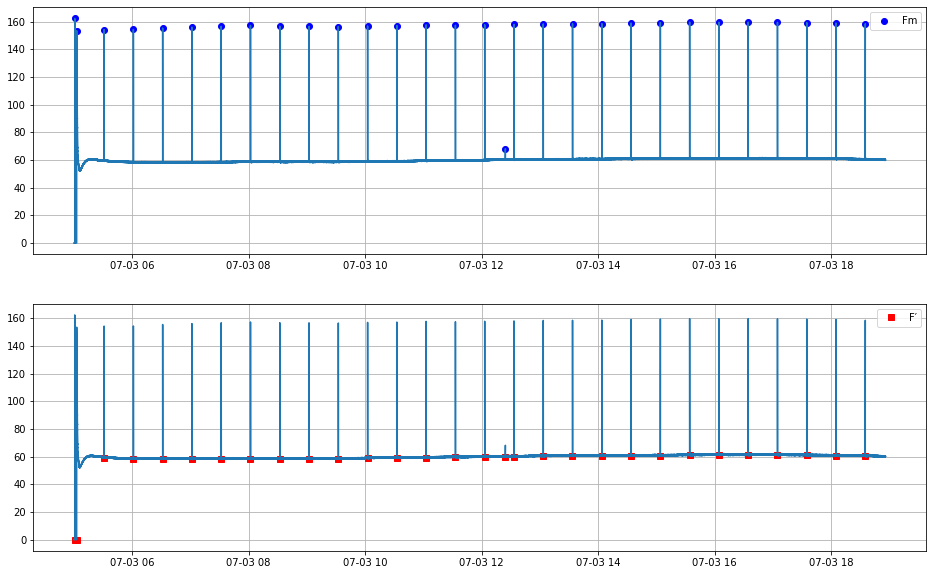

In [24]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 10))
ax1.plot(x[peaks], y[peaks], "ob")
ax1.plot(x, y)
ax1.grid()
ax1.legend(['Fm'])
ax2.plot(x[true_valleys], y[true_valleys], "sr")
ax2.plot(x, y)
ax2.legend(['F′'])
ax2.grid()
plt.show()